In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [101]:
# 데이터 프레임 내 숫자 형태의 string을 int 또는 float으로 변환
def num_str2float(s):
    try:
        return pd.to_numeric(s)
    except ValueError:
        return s

# 데이터 프레임 내 string에서 특정 문자 제거 예: ',' 또는 '_'
def remove_tar_str(s, target_string):
    if isinstance(s, str):
        return s.replace(target_string, '')
    else:
        return s

In [102]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

In [103]:
price_n_interest = pd.read_csv('data/gangnam_price_n_interest.csv', encoding='utf-8', index_col=0)

In [104]:
gangna_price_corr = price_n_interest.drop(['평단가', '금리'], axis=1).corr()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 49688 (\N{HANGUL SYLLABL

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{H

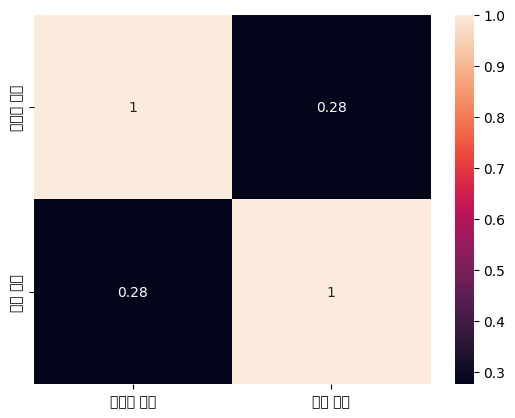

In [105]:
sns.heatmap(gangna_price_corr, annot=True)
plt.show()

In [106]:
gangnag_18 = pd.read_csv('data/18.csv')

In [107]:
gangnag_18['계약년월'].value_counts()

계약년월
201801    794
201808    728
201802    356
201803    334
201809    309
201807    297
201806    140
201805    139
201810    136
201804    134
201812     80
201811     70
Name: count, dtype: int64

In [108]:
#파일 로드 및 변환
def data_prep(file):
    df = pd.read_csv(file, encoding='utf-8') # 파일 CSV 형태로 로드
    df = df.map(lambda x: remove_tar_str(x, ',')).apply(num_str2float) #데이터 프레임 내 특정 string 제거 후 숫자 변환 수행

    df = df.drop(df.columns[9:], axis=1)
    df['거래금액(원)'] = df['거래금액(만원)']*10000
    df['전용면적(평)'] = df['전용면적(㎡)']/3.3
    df['평단가'] = df['거래금액(만원)']/df['전용면적(평)']
    return df

In [109]:
file_list = [
    'data/18.csv',
    'data/19.csv',
    'data/20.csv',
    'data/21.csv',
    'data/22.csv',
    'data/23.csv'
]
N_df = pd.DataFrame()
for file in file_list:
    df = data_prep(file)
    N_df = pd.concat([N_df, df], axis=0)

df_desc = N_df.sort_values(by=['계약년월']).groupby('계약년월').agg({'평단가': 'mean'})

In [110]:
N_df.reset_index(drop=True)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),거래금액(원),전용면적(평),평단가
0,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,3,130000,1300000000,24.233333,5364.511692
1,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,8,117000,1170000000,24.233333,4828.060523
2,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201801,11,130000,1300000000,24.233333,5364.511692
3,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201803,19,139500,1395000000,24.233333,5756.533700
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201804,5,107500,1075000000,16.660606,6452.346308
...,...,...,...,...,...,...,...,...,...,...,...,...
17186,서울특별시 강남구 청담동,23,23,0,현대아파트,84.78,202311,18,184000,1840000000,25.690909,7162.066525
17187,서울특별시 강남구 청담동,75-1,75,1,현대아파트(75-1),95.38,202305,31,211000,2110000000,28.903030,7300.272594
17188,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.26,202302,23,350000,3500000000,41.290909,8476.442096
17189,서울특별시 강남구 청담동,106,106,0,현대한강빌라,136.26,202304,1,295000,2950000000,41.290909,7144.429767


In [111]:
N_df.to_csv("data/18~23.csv", index=True)

In [112]:
trade_volumn = N_df['계약년월'].value_counts()

In [113]:
trade_volumn

계약년월
202006    824
201801    794
201808    728
201910    698
201907    668
         ... 
201902     49
202212     43
202211     38
202209     32
202210     31
Name: count, Length: 71, dtype: int64

In [114]:
temp_out_df = pd.merge(df_desc, trade_volumn, left_index=True, right_index=True, how='inner')

In [115]:
#파일 로드 및 변환
sample_df = pd.read_csv('data/한국은행 기준금리 및 여수신금리_2013_11-2023_11.csv', encoding='utf-8') # 파일 CSV 형태로 로드
sample_df = sample_df.map(lambda x: remove_tar_str(x, ',')).apply(num_str2float) #데이터 프레임 내 특정 string 제거 후 숫자 변환 수행
column_names = sample_df.columns
ref_inter_rate = sample_df.drop(columns=column_names[0:4], axis=1).T.rename(columns={0: "금리"})
ref_inter_rate.index = pd.to_numeric(ref_inter_rate.index.str.replace('/', ''))

In [116]:
final_out_df = pd.merge(temp_out_df, ref_inter_rate, how='inner', left_index=True, right_index=True)

In [117]:
final_out_df

,평단가,count,금리
201801,5284.683427,794,1.5
201802,5162.512642,356,1.5
201803,5559.330421,334,1.5
201804,5408.207363,134,1.5
201805,5384.022908,139,1.5
...,...,...,...
202307,8650.016658,247,3.5
202308,8627.588392,280,3.5
202309,8381.031394,200,3.5
202310,8845.620143,139,3.5


In [118]:
kospi = pd.read_csv('data/kospi.csv',index_col=0)
kosdaq = pd.read_csv('data/kosdaq.csv', index_col=0)

In [119]:
temp_df1 = pd.merge(final_out_df, kospi, how='inner', left_index=True, right_index=True)

In [120]:
temp_df2 = pd.merge(temp_df1, kosdaq, how='inner', left_index=True, right_index=True)

In [121]:
final_final_df = temp_df2.rename(columns={"count": "volume", "0": "kospi", "1": 'kosdaq'})

In [122]:
final_final_df.to_csv("data/completed_gangnam.csv", encoding='utf-8')

In [123]:
gangna_price_corr = final_final_df.corr()
final_final_df.corr()

,평단가,volume,금리,kospi,kosdaq
평단가,1.000000,-0.190558,0.275886,0.489745,0.407282
volume,-0.190558,1.000000,-0.233667,-0.193156,-0.131674
금리,0.275886,-0.233667,1.000000,-0.199335,-0.198108
kospi,0.489745,-0.193156,-0.199335,1.000000,0.933044
kosdaq,0.407282,-0.131674,-0.198108,0.933044,1.000000


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-

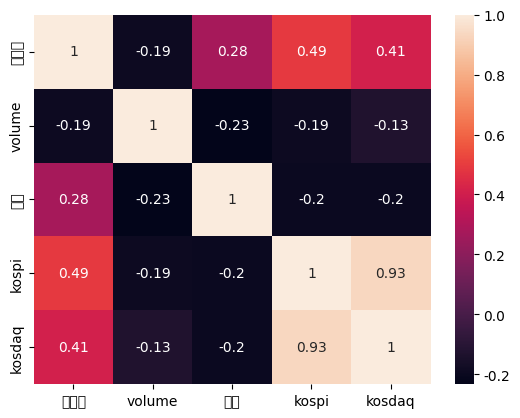

In [124]:
sns.heatmap(gangna_price_corr, annot=True)
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  se

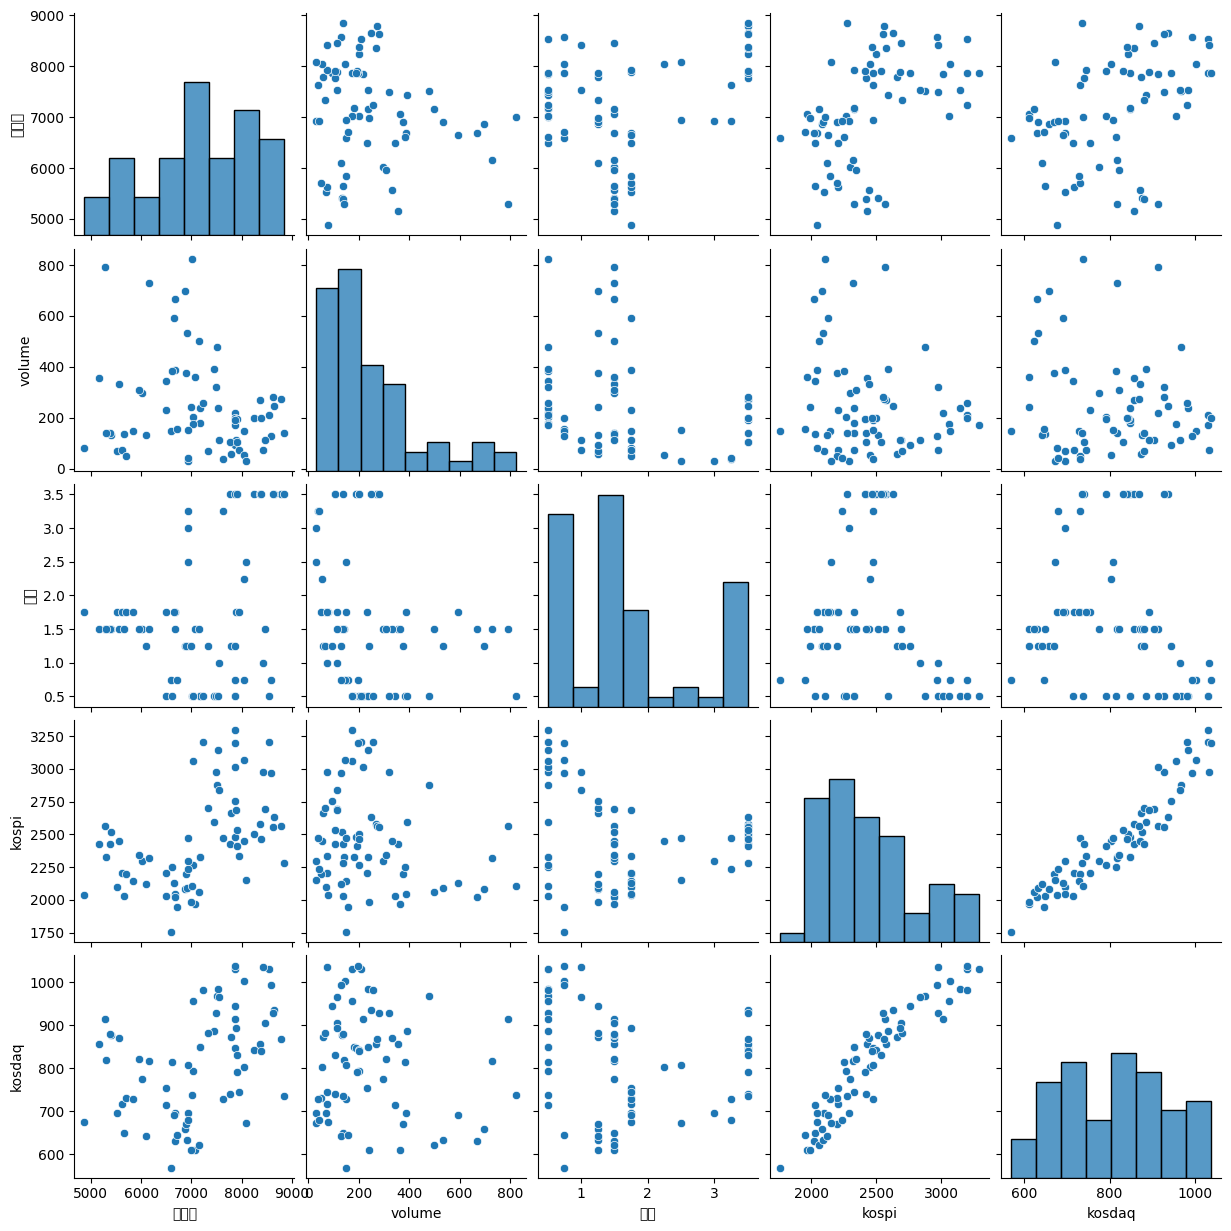

In [125]:
sns.pairplot(final_final_df) # markers는 hue를지정했을 경우에만 사용 가능하며 hue에 지정된 컬럼의 데이터 범주의 개수와 일치
plt.show()

In [126]:
simli_df = pd.read_csv("data/simli.csv", index_col=0)
hwan_df = pd.read_csv('data/hwan.csv', index_col=0)

In [127]:
temp_df = pd.merge(final_final_df, simli_df, how='inner', left_index=True, right_index=True)
final_final_df = pd.merge(temp_df, hwan_df, how='inner', left_index=True, right_index=True)
final_final_df.to_csv('data/completed_gangnam.csv')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
/Users/yunseojeong/miniconda3/envs/study-

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

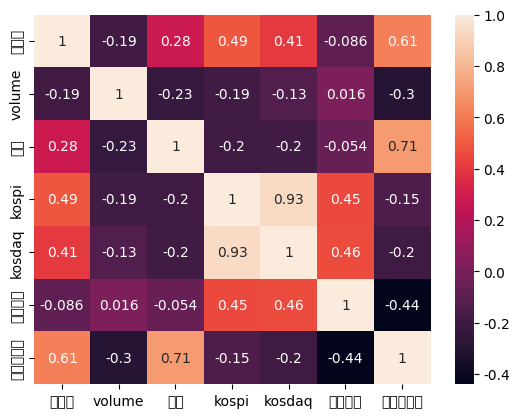

In [128]:
sns.heatmap(final_final_df.corr(), annot=True)
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  se

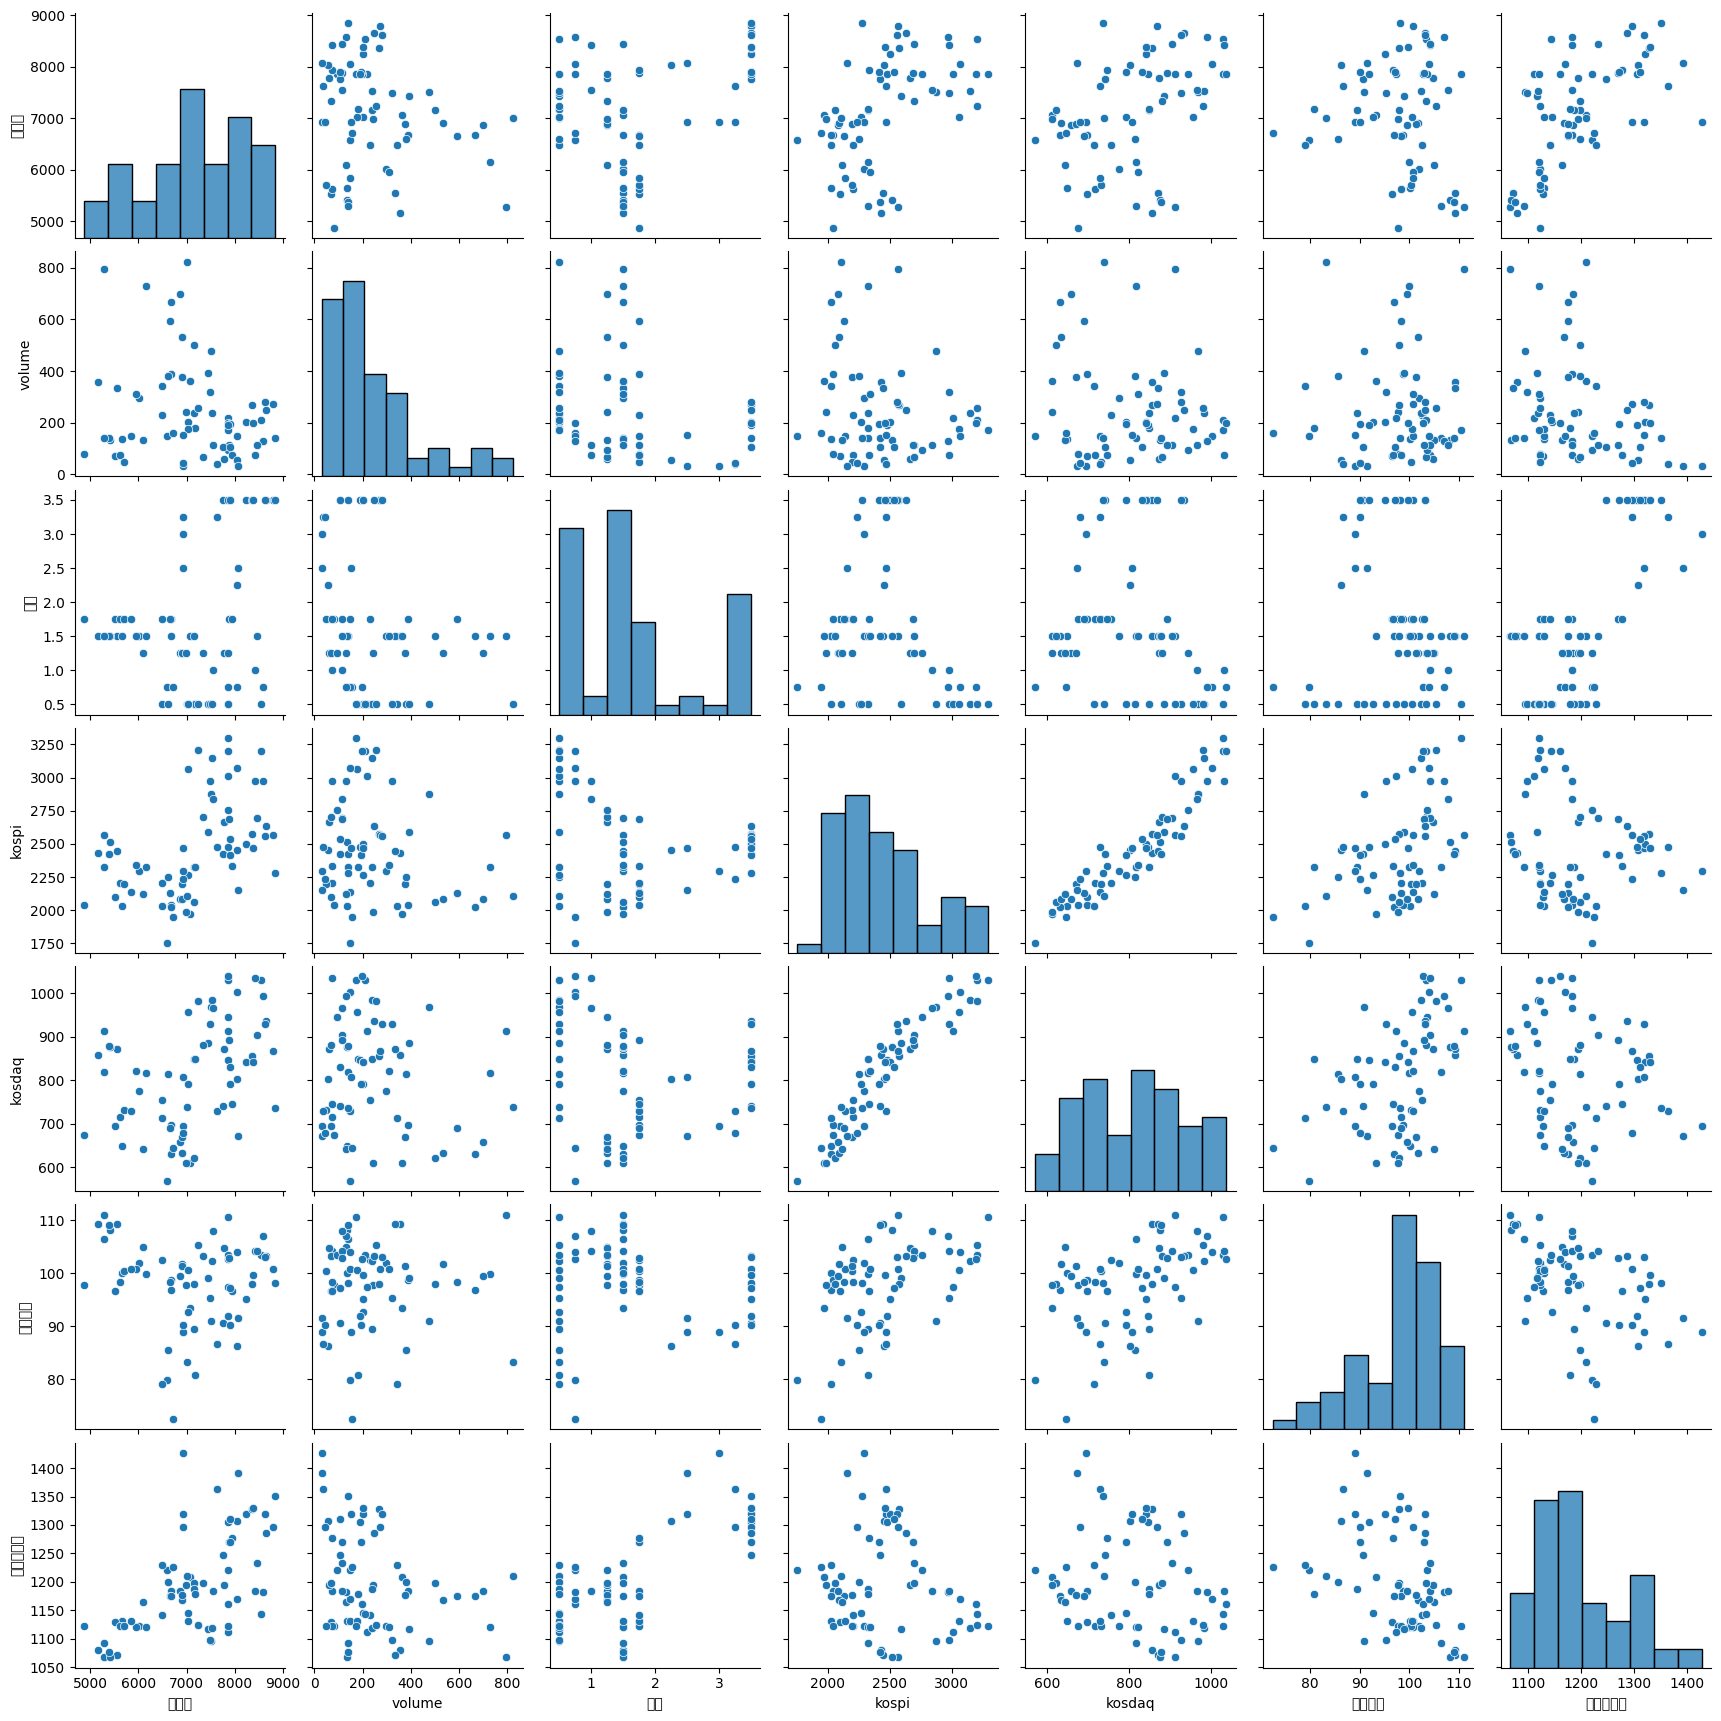

In [129]:
sns.pairplot(final_final_df) # markers는 hue를지정했을 경우에만 사용 가능하며 hue에 지정된 컬럼의 데이터 범주의 개수와 일치
plt.show()

<Axes: xlabel='kospi', ylabel='평단가'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

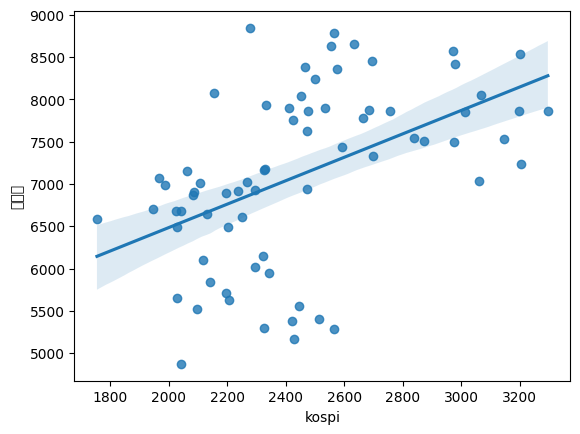

In [130]:
sns.regplot(x="kospi", y="평단가", data=final_final_df)


<Axes: xlabel='kosdaq', ylabel='평단가'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

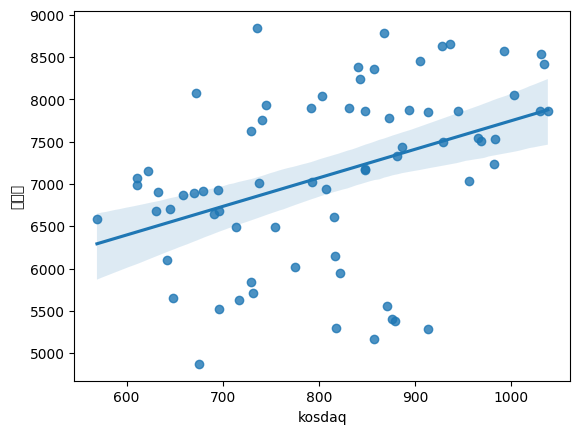

In [131]:
sns.regplot(x="kosdaq", y="평단가", data=final_final_df)

<Axes: xlabel='원달러환율', ylabel='평단가'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) mi

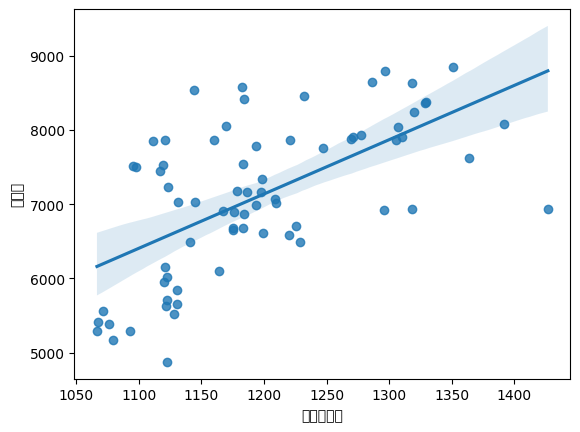

In [132]:
sns.regplot(x="원달러환율", y="평단가", data=final_final_df)


<Axes: xlabel='금리', ylabel='volume'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/yunseojeong/miniconda3/envs/study-env/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/Users/yunseojeong/miniconda3/envs/study-env/

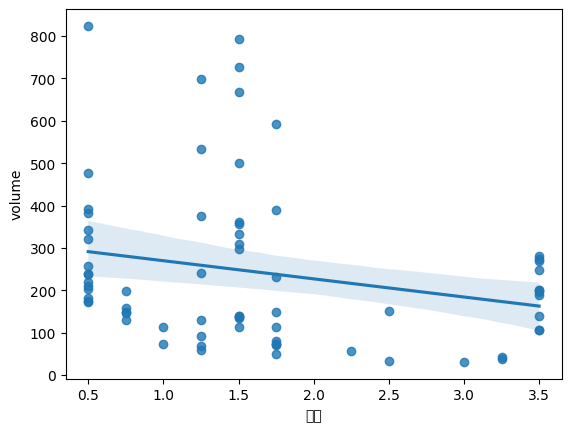

In [133]:
sns.regplot(x="금리", y="volume", data=final_final_df)